# NLP Heatmaps with Seaborn

In [27]:
from jupyterthemes import jtplot
import warnings
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
# ignore warnings
warnings.filterwarnings('ignore')

jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

In [16]:
df=pd.read_csv('../processed_data/nf_complete.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             126 non-null    int64 
 1   year                   126 non-null    int64 
 2   title                  126 non-null    object
 3   abstract               126 non-null    object
 4   theme                  126 non-null    object
 5   China                  126 non-null    int64 
 6   Russia                 126 non-null    int64 
 7   War                    126 non-null    int64 
 8   President              126 non-null    int64 
 9   US                     126 non-null    int64 
 10  Vietnam                126 non-null    int64 
 11  Cold War               126 non-null    int64 
 12  World War              126 non-null    int64 
 13  Vietnam War            126 non-null    int64 
 14  Korean War             126 non-null    int64 
 15  Survey                 

In [18]:
import plotly_express as ple
ple.histogram(df.sort_values('year').groupby(['year','theme'])['Cold War'].sum().reset_index(), x="year", y="Cold War", histfunc="sum", color="theme")

In [19]:
# ple.lidifferences(dfm_regional.sort_values('year').groupby(['year','theme'])['Cold War'].sum().reset_index(),
#          x='year',
#          y='Cold War',
#          line_group='theme',
#          color='theme'
#         )

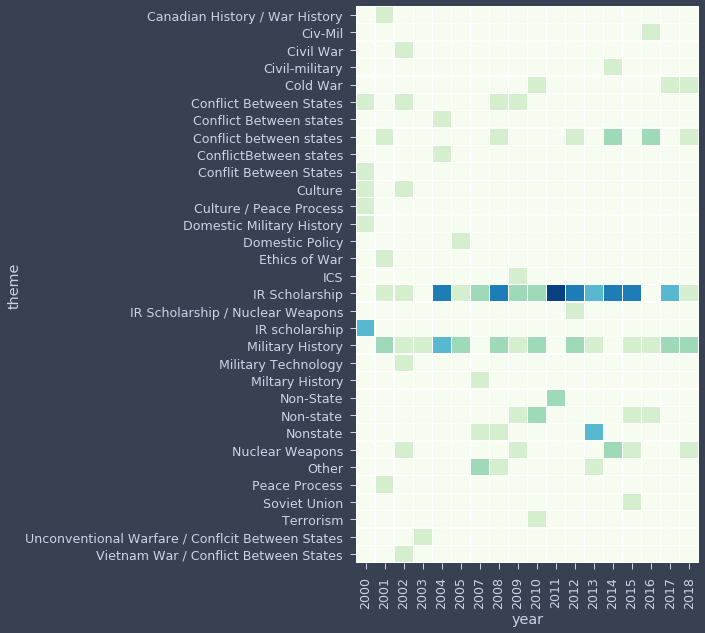

<Figure size 720x648 with 0 Axes>

In [20]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["theme"], df["year"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="GnBu", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.tight_layout()
#plt.savefig('./img/theme_heat_1.png', bbox_inches='tight', dpi=500)


#Show the plot
plt.show()
plt.clf()

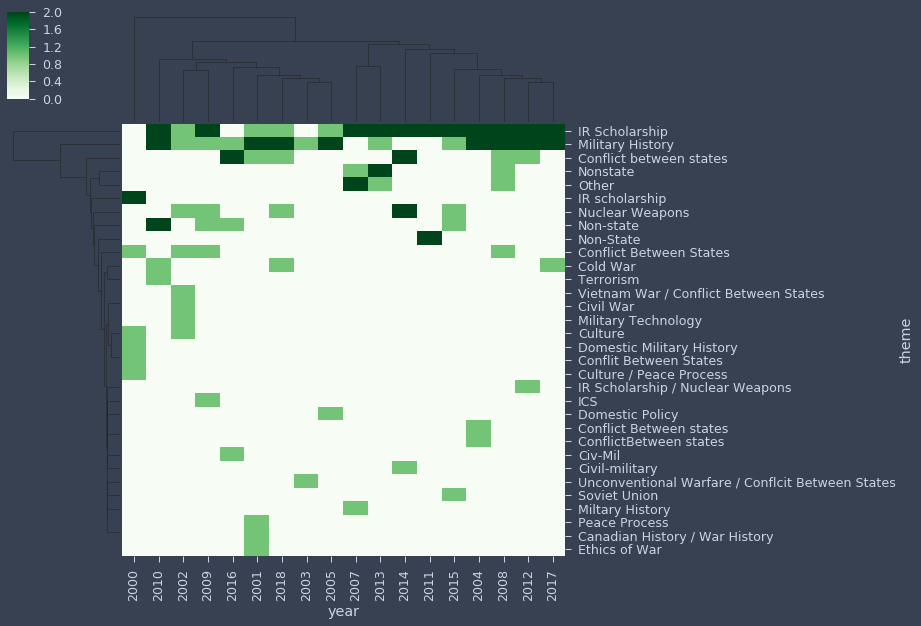

In [21]:
sns.clustermap(pd_crosstab, cmap='Greens', robust=True)

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")

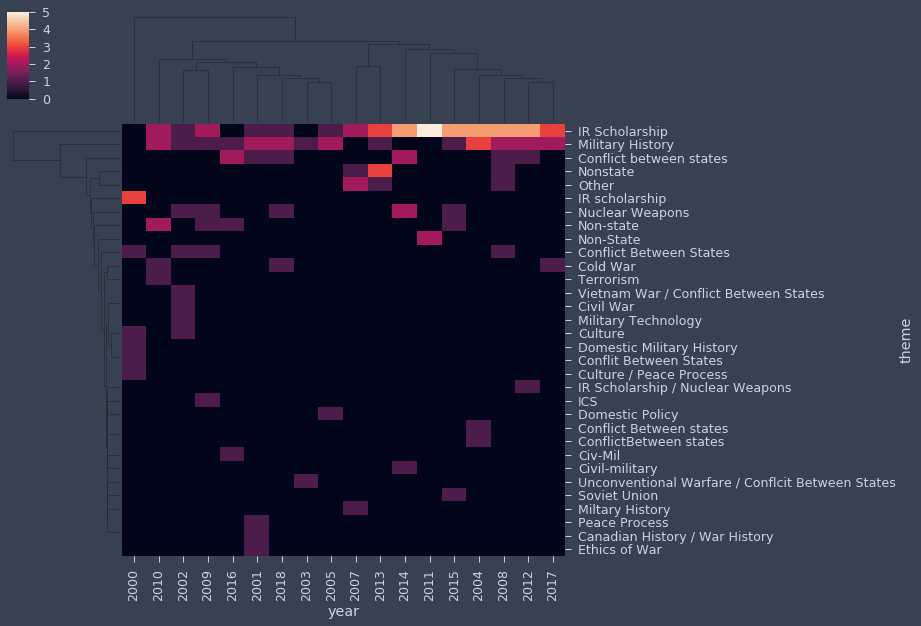

In [22]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = df.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(pd_crosstab,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

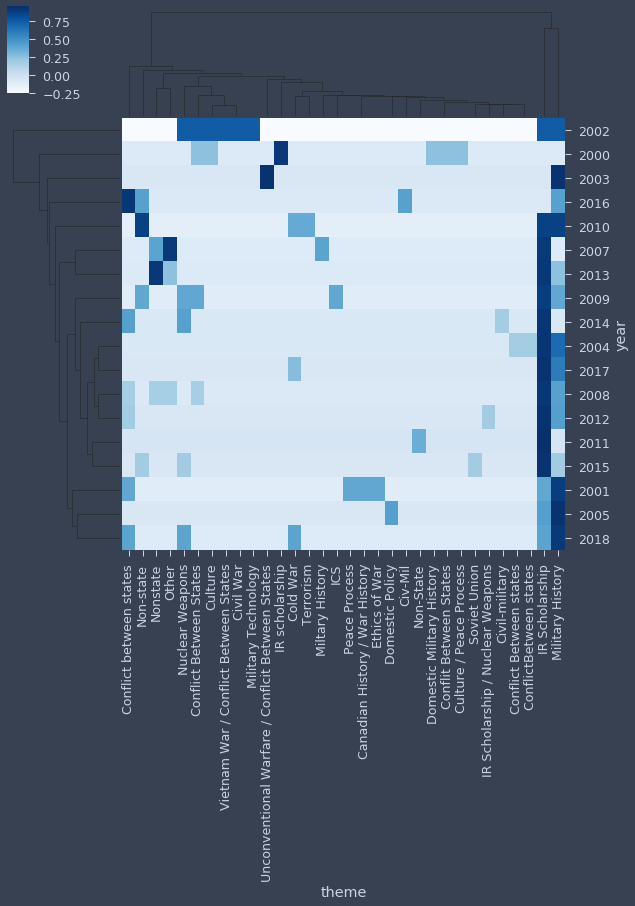

In [23]:
data_normalized = pd_crosstab

# Standardize the mean and variance within a stat, so different stats can be comparable
# (This is the same as changing all the columns to Z-scores)
data_normalized = (data_normalized - data_normalized.mean())/data_normalized.var()

# Normalize these values to range from -1 to 1
data_normalized = (data_normalized)/(data_normalized.max() - data_normalized.min())

data_normalized = data_normalized.T

# Can use a semicolon after the command to suppress output of the row_dendrogram and col_dendrogram.
sns.clustermap(data_normalized, cmap='Blues');

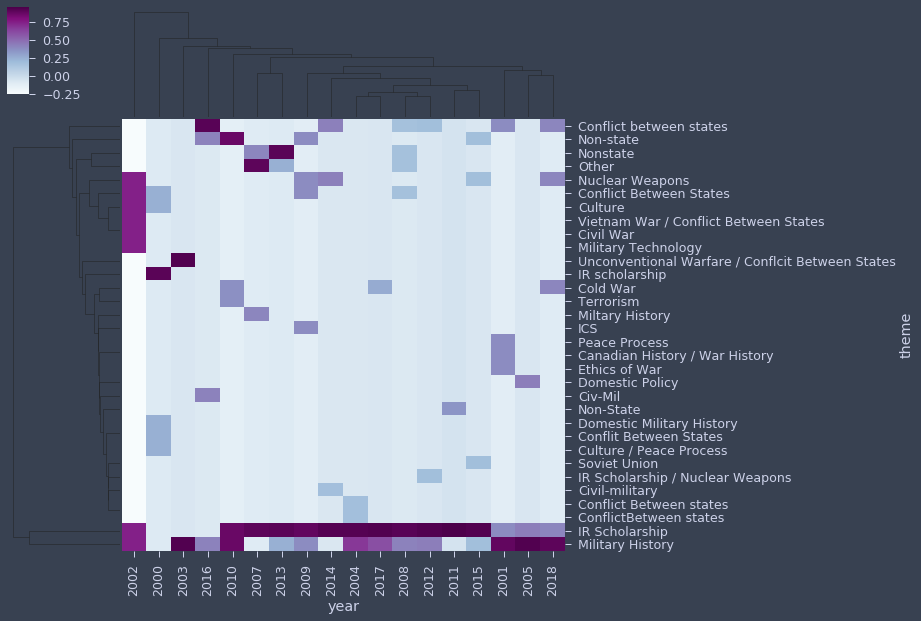

In [24]:
data_normalized = pd_crosstab

# Standardize the mean and variance within a stat, so different stats can be comparable
# (This is the same as changing all the columns to Z-scores)
data_normalized = (data_normalized - data_normalized.mean())/data_normalized.var()

# Normalize these values to range from -1 to 1
data_normalized = (data_normalized)/(data_normalized.max() - data_normalized.min())

#data_normalized = data_normalized.T

# Can use a semicolon after the command to suppress output of the row_dendrogram and col_dendrogram.
sns.clustermap(data_normalized, cmap='BuPu');

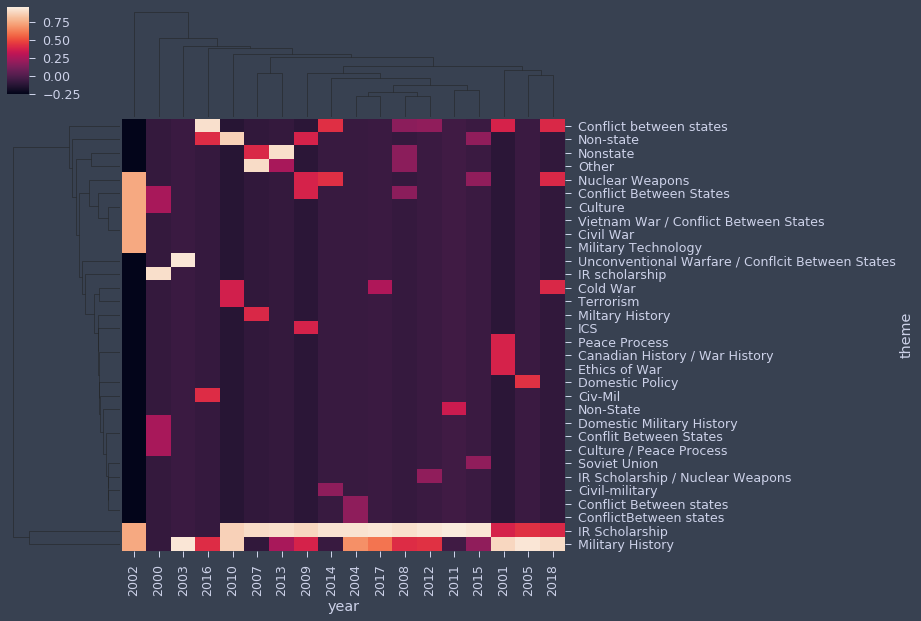

In [25]:
import matplotlib.pyplot as plt
sns.clustermap(data_normalized);
fig = plt.gcf()
fig.savefig('clusteredheatmap_bbox_tight.png', bbox_inches='tight')

In [26]:
tidy_df = pd.melt(df.reset_index(), id_vars='index')
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
Unnamed: 0,0,1,2,3,4,5,6,7,14,13,...,128,130,123,125,131,132,133,134,135,136
year,2000,2000,2000,2000,2000,2000,2000,2000,2001,2001,...,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018
title,"""Institutions at the Domestic/International Ne...",Born to Lose and Doomed to Survive: State Deat...,The significance of “allegiance” in internatio...,The significance of “allegiance” in internatio...,Truth-Telling and Mythmaking in Post-Soviet Ru...,"Building a Cape Fear Metropolis: Fort Bragg, F...",The Glories and the Sadness: Shaping the natio...,What leads longstanding adversaries to engage ...,A School for the Nation: Military Institution...,The 'American Century' Army: The Origins of t...,...,Fully Committed? Religiously Committed State P...,Straddling the Threshold of Two Worlds: Soldie...,U.S. Army’s Investigation and Adjudication of ...,Grand Strategic Crucibles: The Lasting Effects...,Trust in International Politics: The Role of L...,Planning for the Short Haul: Trade Among Belli...,Clinging to the Anti-Imperial Mantle: The Repu...,The New Navy's Pacific Wars: Peripheral Confl...,"Stop or I'll Shoot, Comply and I Won't: The Di...","Unexpected Humanitarians: Albania, the U.S. Mi..."
abstract,Civil-military relations are frequently studie...,"Under what conditions do states die, or exit t...",My dissertation employs original and secondary...,\nThis study revises prevailing interpretation...,Can distorted and pernicious ideas r histo...,My dissertation examines the cultural and econ...,In my dissertation I compare the ways in whic...,This dissertation develops a socio-psychoanal...,Beginning in Europe in the latter half of the ...,This dissertation covers the period 1949-1959 ...,...,This dissertation argues that the higher the l...,This dissertation explores how American soldie...,This dissertation examines the U.S. Army’s res...,When and how do military interventions shape g...,"In my dissertation, I focus on how leader rela...","In times of war, why do belligerents continue ...","My dissertation project, Clinging to the Anti-...",Using a transnational methodology and sources ...,There is a dilemma at the heart of coercion. S...,"Using archives and oral history, this disserta..."
theme,IR scholarship,IR scholarship,IR scholarship,Conflit Between States,Conflict Between States,Domestic Military History,Culture,Culture / Peace Process,Military History,Military History,...,IR Scholarship,Military History,Military History,IR Scholarship,Nuclear Weapons,Conflict between states,Cold War,Military History,IR Scholarship,Military History
